# 10 Convolutional Neural Networks
CNNs) are a specialized type of artificial neural network designed for processing grid-like data, such as images. They are particularly well-suited for computer vision tasks due to their ability to automatically learn hierarchical representations from raw pixel values.
CNNs have been highly successful in various applications, such as image classification, object detection, image segmentation, and more.

In [ ]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

1. Dataset Preparation:
* Download and preprocess the Caltech-256 dataset. You can use the tensorflow_datasets library to load the dataset conveniently.
* Normalize the pixel values of the images to the range [0, 1].
* Split the dataset into training and testing sets.

In [ ]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='C:\\Users\\ivanc\\PycharmProjects\\scientificProject',
)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Aumentar tamaño del batch y habilitar data augmentation
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(64)
test_dataset = test_dataset.map(preprocess_image).batch(64)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3060 [00:00<?, ? examples/s]

Shuffling C:\Users\ivanc\PycharmProjects\scientificProject/caltech101/3.0.1.incomplete7L1G3I/caltech101-train.…

Generating test examples...:   0%|          | 0/6084 [00:00<?, ? examples/s]

Shuffling C:\Users\ivanc\PycharmProjects\scientificProject/caltech101/3.0.1.incomplete7L1G3I/caltech101-test.t…

Dataset caltech101 downloaded and prepared to C:\Users\ivanc\PycharmProjects\scientificProject/caltech101/3.0.1. Subsequent calls will reuse this data.


2. Build the CNN Model:
Define a CNN model with the following architecture:
* Convolutional Layer 1: 32 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 1: Pooling size (2x2).
* Convolutional Layer 2: 64 filters, kernel size (3x3), ReLU activation.
* Max Pooling Layer 2: Pooling size (2x2).
* Flatten the feature maps.
* Fully Connected Layer 1: 128 units, ReLU activation.
* Output Layer: Number of units equal to the number of classes in the Caltech-101 dataset.

In [ ]:
# Utilizar una arquitectura más profunda
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Agregar dropout para regularización
    layers.Dense(num_classes, activation='softmax')
])

3. Training the Model:
* Compile the model with an appropriate optimizer and loss function.
* Train the model using the training dataset and validate it using the testing dataset.
* Observe the training process, including the loss and accuracy metrics.

In [ ]:
# Utilizar una tasa de aprendizaje más pequeña
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Aumentar epochs para que haya más iteraciones de entrenamiento
model.fit(train_dataset, epochs=20, validation_data=test_dataset)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

4. Understanding Parameter Sharing and Local Receptive Fields:
* Analyze the number of learnable parameters in each layer of the CNN model.

¿What is parameter sharing? ¿What's its role in reducing the model's complexity?

In [ ]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")


Number of trainable parameters in the model: 22270886


5. Evaluation and Interpretation:
* Evaluate the model's performance on the testing dataset and calculate the accuracy.
* Visualize some misclassified images and discuss the possible reasons for misclassifications.

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

10/10 [==============================] - 13s 1s/step - loss: 3.6981 - accuracy: 0.2794
Accuracy on the test set: 27.94%


2/2 [==============================] - 1s 79ms/step


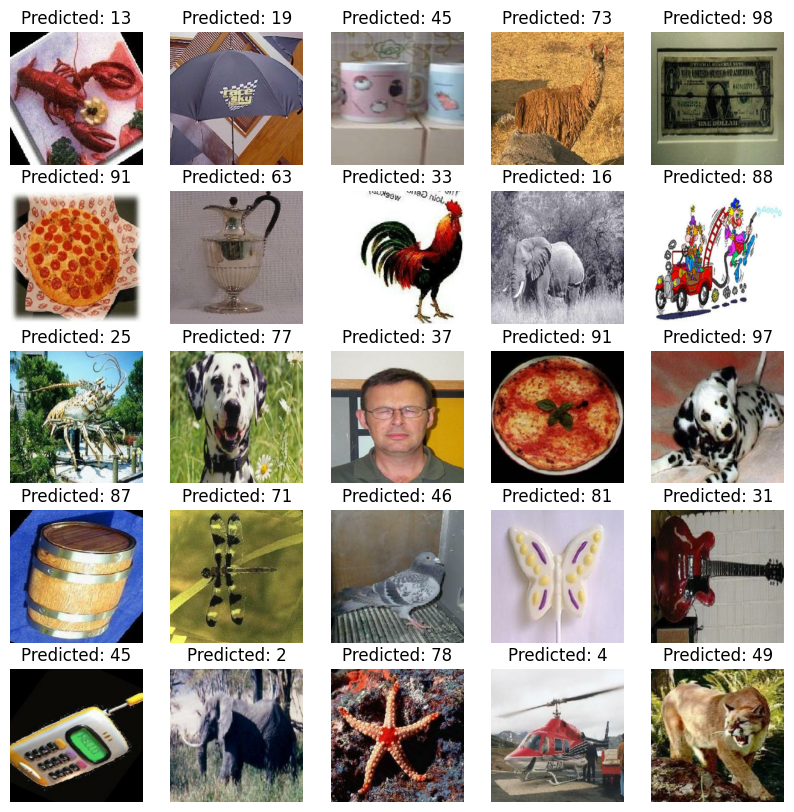

In [ ]:
misclassified_images = []
misclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]

    misclassified_images.extend(tf.gather(image, misclassified_idx).numpy())
    misclassified_labels.extend(predicted_label[misclassified_idx])

num_images_to_show = min(len(misclassified_images), 25)  # Mostrar solo las primeras 25 imágenes
plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()


6. Pick a sample image and show the feature maps activated by the convolutional layers

1/1 [==============================] - 0s 121ms/step


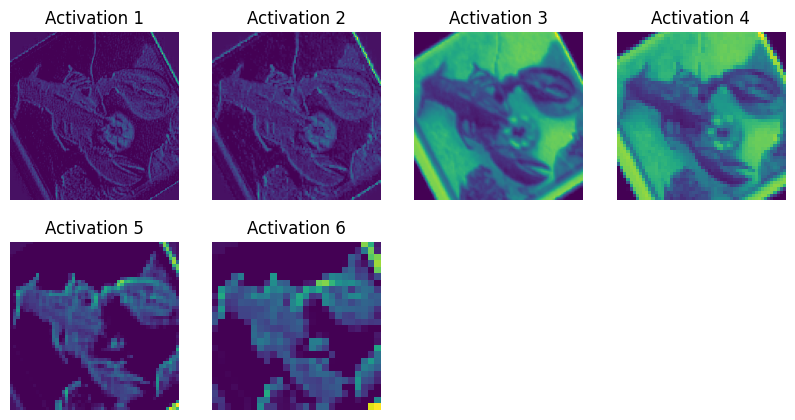

In [ ]:
sample_image, _ = next(iter(test_dataset))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(sample_image)

plt.figure(figsize=(10, 5))
for i, activation in enumerate(activations):
    # Si la activación es 4D (capas convolucionales)
    if len(activation.shape) == 4:
        num_filters = activation.shape[-1]
        plt.subplot(2, 4, i+1)
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
        plt.title(f"Activation {i+1}")
        plt.axis('off')
plt.show()


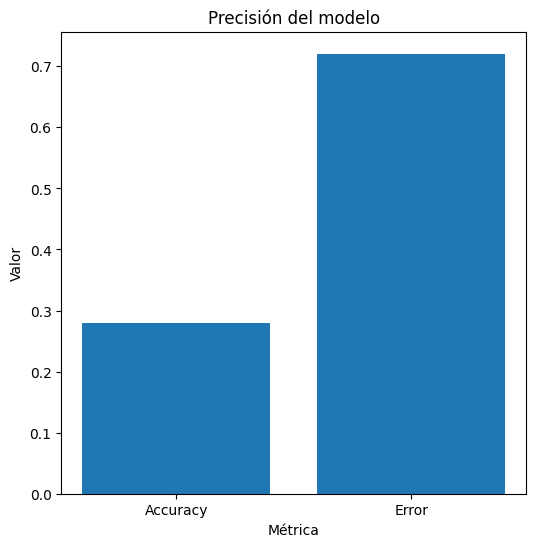

In [ ]:
# Visualizar la precisión en un gráfico de barras o de pastel
labels = ['Accuracy', 'Error']
values = [accuracy, 1 - accuracy]

plt.figure(figsize=(6, 6))
plt.bar(labels, values)
plt.title('Precisión del modelo')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.show()